# Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from fbprophet import Prophet

# Loading the Dataset

In [2]:
dataset_train = pd.read_csv('housing_train.csv')
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# Data Preprocessing

In [3]:
dataset_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
dataset_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

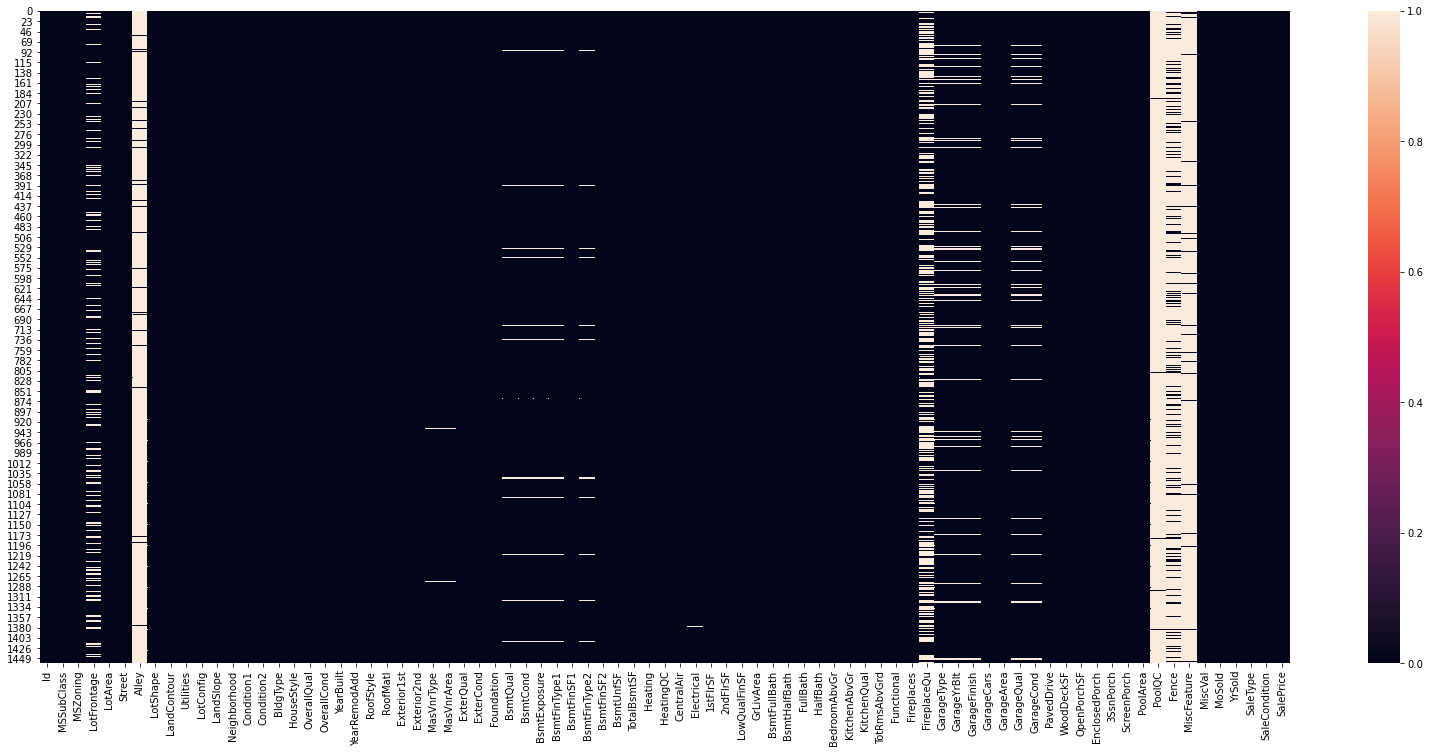

In [6]:
#Checking for null values
plt.figure(figsize=(28,12))
sns.heatmap(dataset_train.isna())

In [7]:
# Taking care of the null values(removing columns with missing more than 10% of dataset i.e. 146)

for i in dataset_train.columns:
    if(dataset_train[i].isna().sum()>=146):
        dataset_train.drop(i,inplace=True,axis=1)
    else:
        dataset_train[i] = dataset_train[i].fillna(method='pad')

<AxesSubplot:>

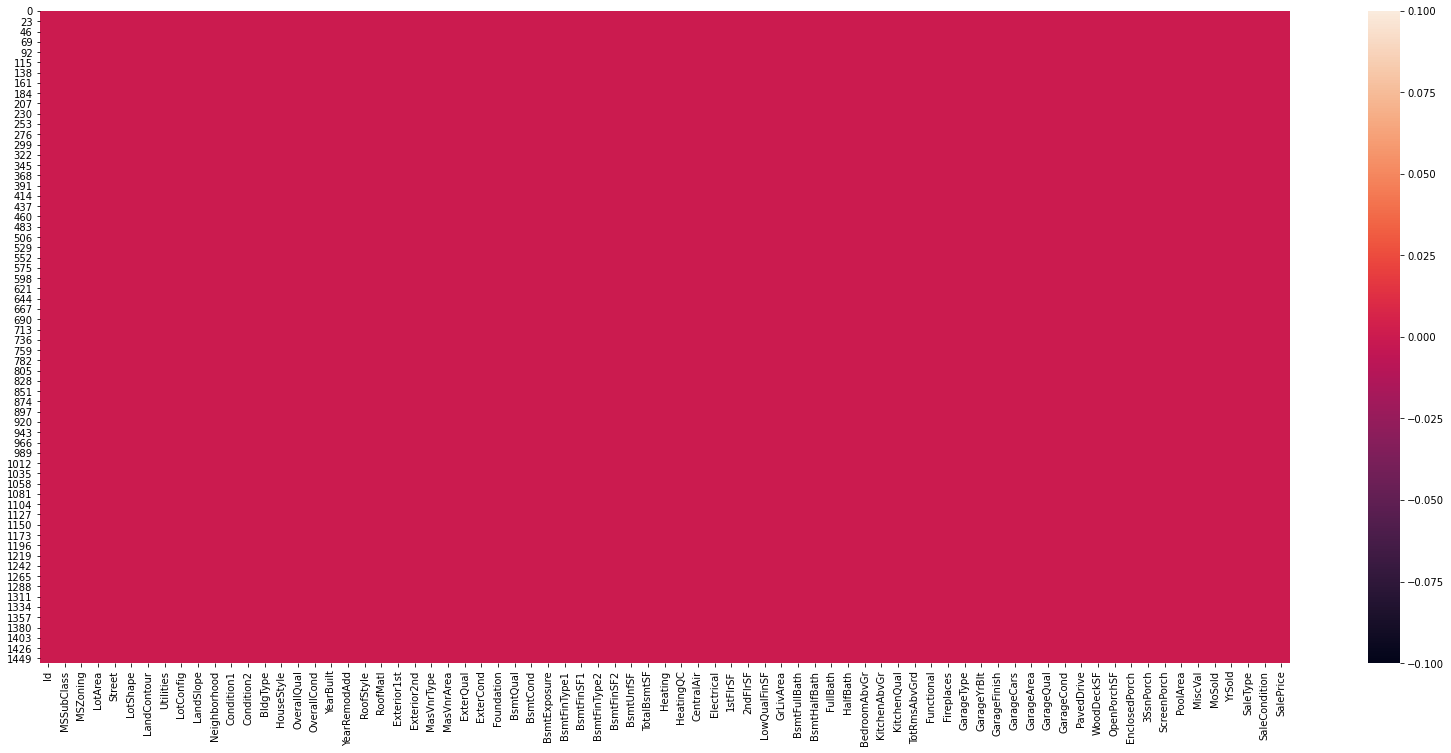

In [8]:
# No null values
plt.figure(figsize=(28,12))
sns.heatmap(dataset_train.isna())

In [9]:
# Removed 6 columns
dataset_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [10]:
dataset_train.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.492466,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.795612,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,165.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo


# Data Analysis

<AxesSubplot:xlabel='Street', ylabel='count'>

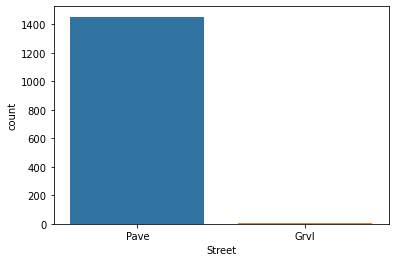

In [12]:
sns.countplot(data=dataset_train,x='Street')

### It is seen that majority of the houses sold are on the Pave street

<AxesSubplot:xlabel='SaleType', ylabel='count'>

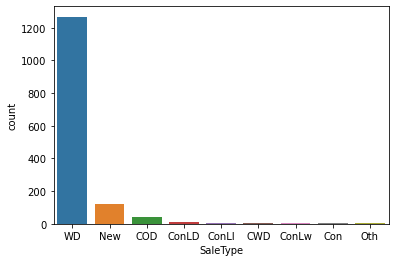

In [13]:
sns.countplot(data=dataset_train, x= 'SaleType')

### Majority of the People pefer to buy houses through Warranty Deed

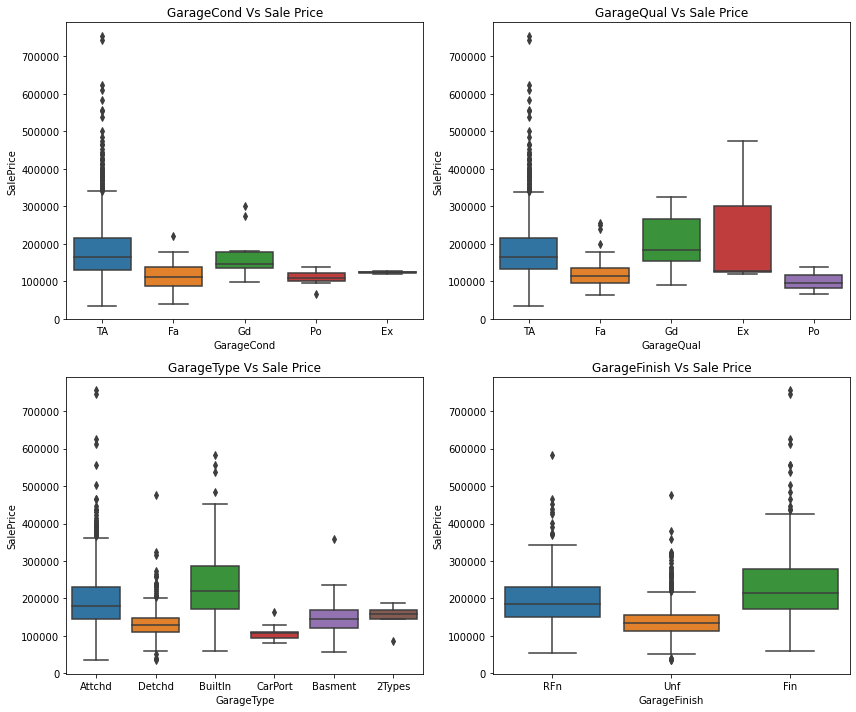

In [14]:
# Garage on sales
fig, axis = plt.subplots(2,2, figsize = (12,10))
sns.boxplot(data=dataset_train, x = 'GarageCond', y = 'SalePrice', ax=axis[0,0])
axis[0,0].set_title('GarageCond Vs Sale Price' )

sns.boxplot(data=dataset_train, x = 'GarageQual', y = 'SalePrice', ax=axis[0,1])
axis[0,1].set_title('GarageQual Vs Sale Price' )

sns.boxplot(data=dataset_train, x = 'GarageType', y = 'SalePrice', ax=axis[1,0])
axis[1,0].set_title('GarageType Vs Sale Price' )

sns.boxplot(data=dataset_train, x = 'GarageFinish', y = 'SalePrice', ax=axis[1,1])
axis[1,1].set_title('GarageFinish Vs Sale Price')

plt.tight_layout()

### If the forage quality is excellent/good and if there is a furnished built-in garage then sale price increases

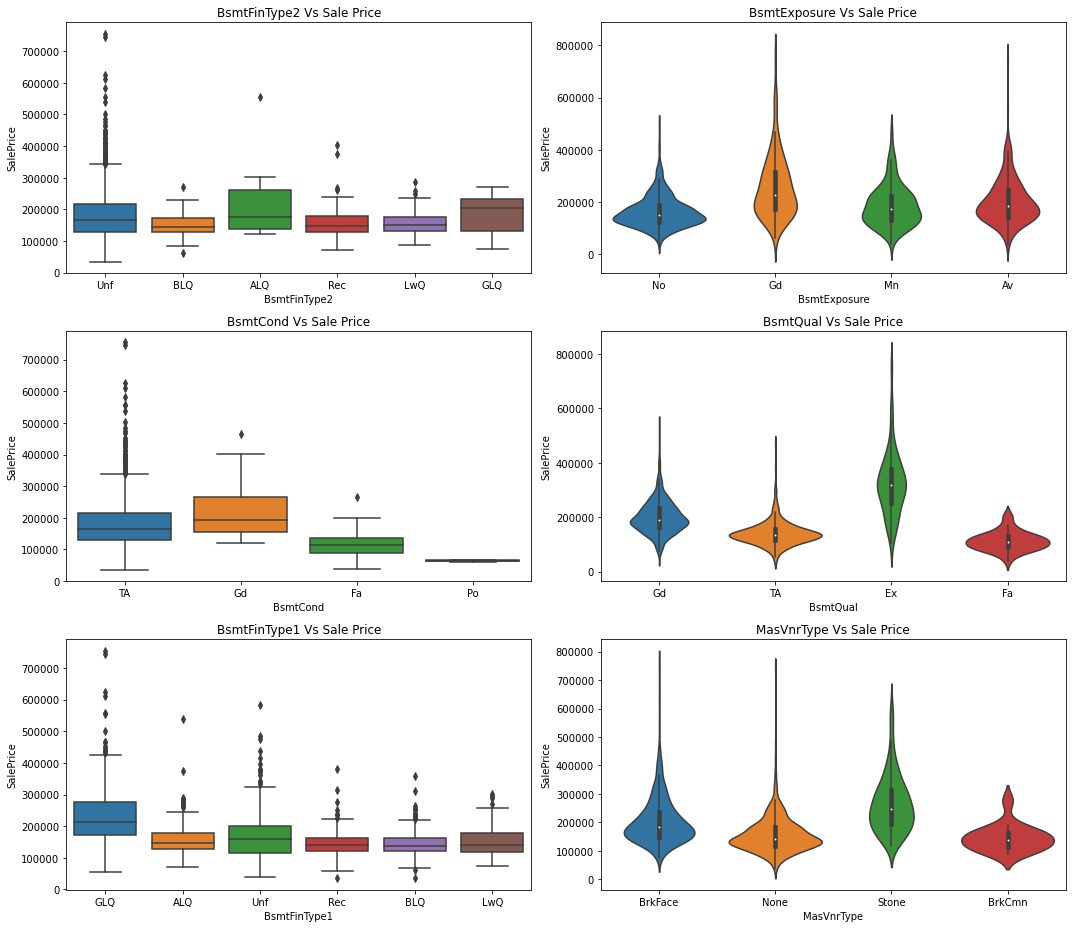

In [15]:
# Basement on sales
fig, axis = plt.subplots(3,2, figsize = (15,13))

sns.boxplot(data=dataset_train, x = 'BsmtFinType2', y = 'SalePrice', ax=axis[0,0])
axis[0,0].set_title('BsmtFinType2 Vs Sale Price' )

sns.violinplot(data=dataset_train, x = 'BsmtExposure', y = 'SalePrice', ax=axis[0,1])
axis[0,1].set_title('BsmtExposure Vs Sale Price' )

sns.boxplot(data=dataset_train, x = 'BsmtCond', y = 'SalePrice', ax=axis[1,0])
axis[1,0].set_title('BsmtCond Vs Sale Price' )

sns.violinplot(data=dataset_train, x = 'BsmtQual', y = 'SalePrice', ax=axis[1,1])
axis[1,1].set_title('BsmtQual Vs Sale Price')

sns.boxplot(data=dataset_train, x = 'BsmtFinType1', y = 'SalePrice', ax = axis[2,0])
axis[2,0].set_title('BsmtFinType1 Vs Sale Price')

sns.violinplot(data=dataset_train, x = 'MasVnrType', y = 'SalePrice', ax = axis[2,1])
axis[2,1].set_title('MasVnrType Vs Sale Price')

plt.tight_layout() 


### If the quality of basment is excellent/good and condition is good Sale price increases

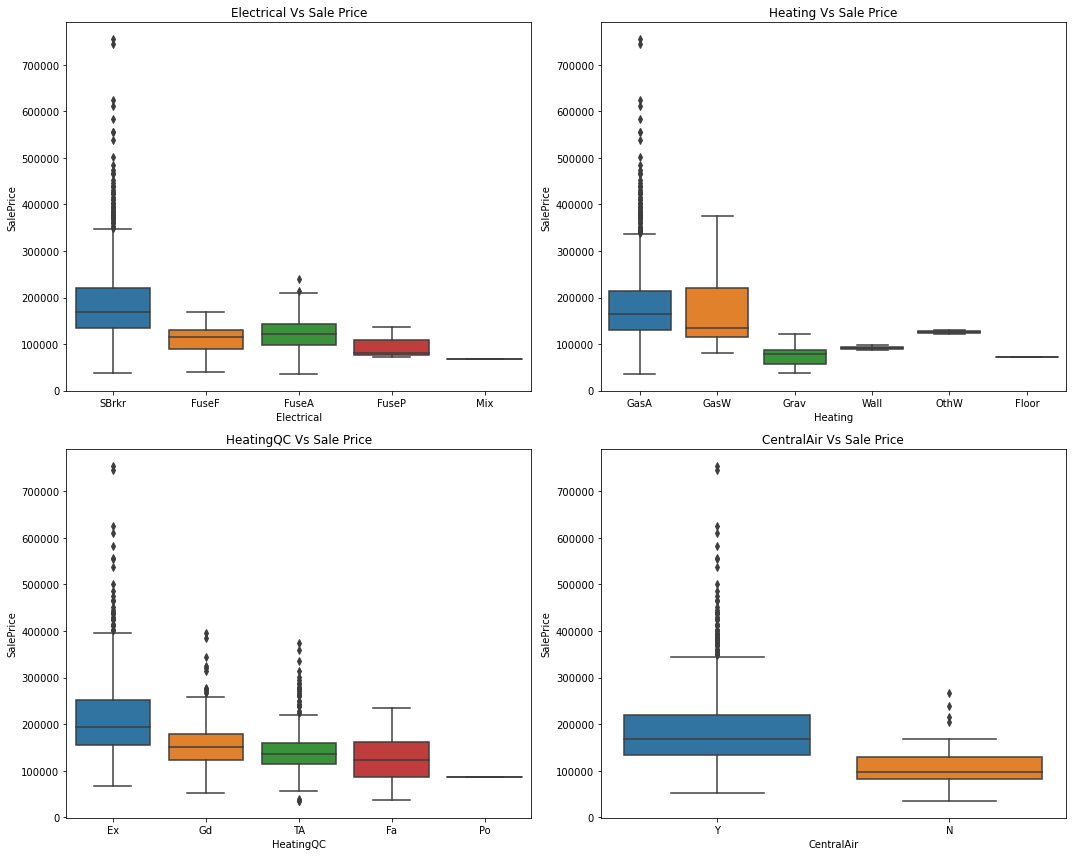

In [16]:
#Extra commodities effecting the sale price
fig, axis = plt.subplots(2,2, figsize = (15,12))

sns.boxplot(data=dataset_train, x = 'Electrical', y = 'SalePrice', ax=axis[0,0])
axis[0,0].set_title('Electrical Vs Sale Price' )

sns.boxplot(data=dataset_train, x = 'Heating', y = 'SalePrice', ax=axis[0,1])
axis[0,1].set_title('Heating Vs Sale Price' )

sns.boxplot(data=dataset_train, x = 'HeatingQC', y = 'SalePrice', ax=axis[1,0])
axis[1,0].set_title('HeatingQC Vs Sale Price' )

sns.boxplot(data=dataset_train, x = 'CentralAir', y = 'SalePrice', ax=axis[1,1])
axis[1,1].set_title('CentralAir Vs Sale Price')

plt.tight_layout()

### Having a breaker circuit as well as Gas type heating facility can also increase the sale price

### Having Excellent Heating Quality and Central Air Conditioning increase the sale prices

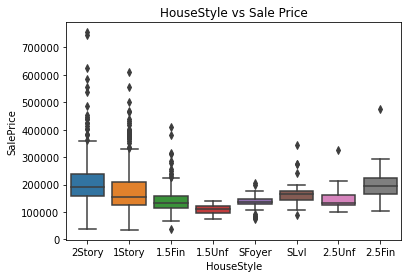

In [17]:
# House style
sns.boxplot(data = dataset_train, x = 'HouseStyle', y = 'SalePrice')
plt.title('HouseStyle vs Sale Price')
plt.show()

### Having a 2-storey house can increase the sales price by a bit than having a 1-storey one

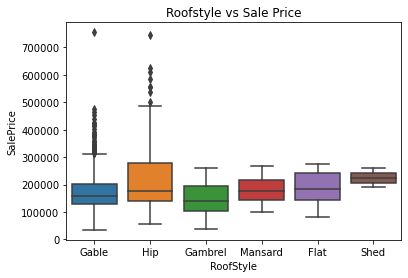

In [18]:
# Roofstyle
sns.boxplot(data = dataset_train, x = 'RoofStyle', y = 'SalePrice')
plt.title('Roofstyle vs Sale Price')
plt.show()

### Having a hip style roof can increase in the sale price

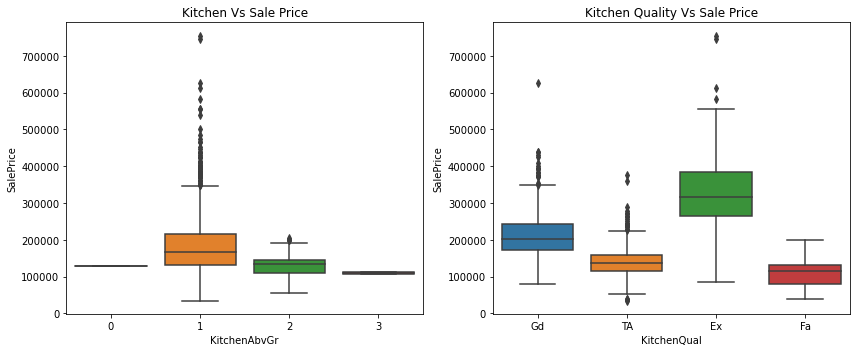

In [19]:
#Kitchen
fig, axis = plt.subplots(1,2, figsize = (12,5))

sns.boxplot(data = dataset_train, x = 'KitchenAbvGr', y = 'SalePrice',ax=axis[0])
axis[0].set_title('Kitchen Vs Sale Price' )

sns.boxplot(data = dataset_train, x = 'KitchenQual', y = 'SalePrice',ax=axis[1])
axis[1].set_title('Kitchen Quality Vs Sale Price' )

plt.tight_layout()

### Having a Kitchen above grade 1 with excellent quality can increases the sales price

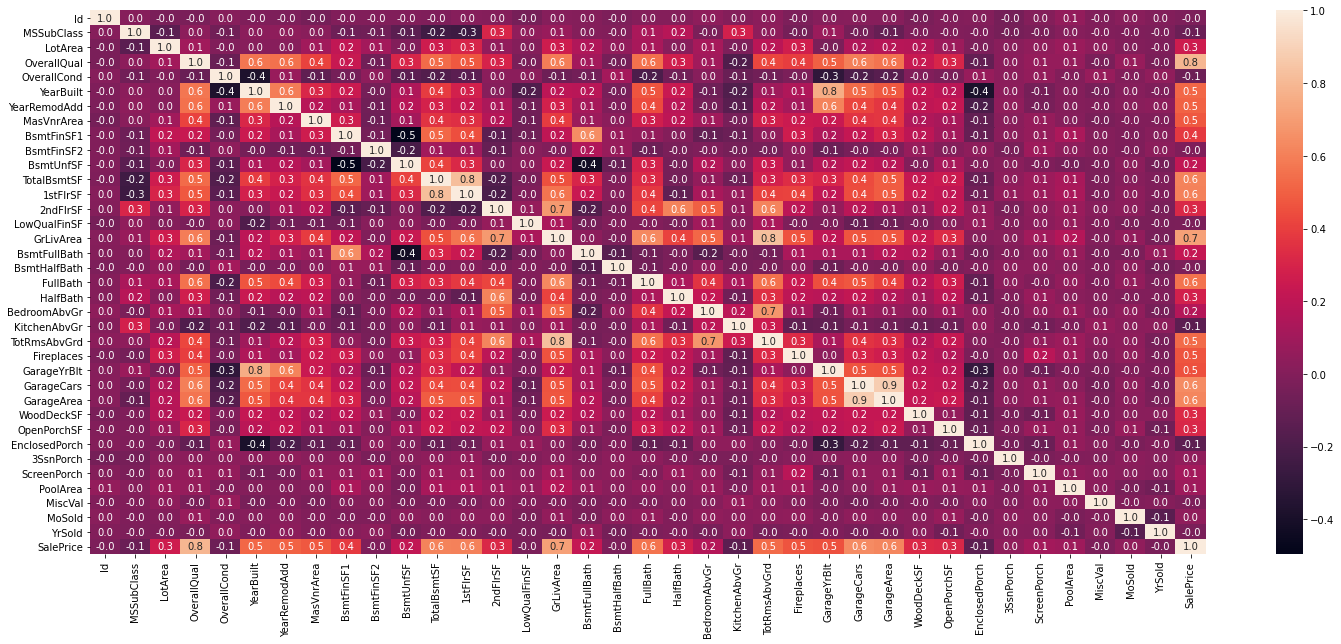

In [20]:
# Correlation
plt.figure(figsize=(25,10))
heatmap_plot = sns.heatmap(dataset_train.corr(),annot=True,fmt='.1f')
figure = heatmap_plot.get_figure()

### Above are all the columns (i.e., factors) which are correlated to the sales price based on the data provided

# Making prediction regarding Future

In [21]:
# Slicing only columns required for prediction
data = dataset_train[['YrSold','SalePrice']].rename(columns={'YrSold':'ds','SalePrice':'y'})
data = data.sort_values(by=['ds','y'])

In [22]:
#Converting year column to dummy timestamp
year = data.ds.values
year

array([2006, 2006, 2006, ..., 2010, 2010, 2010], dtype=int64)

In [23]:
# Dummy data generation
import random
month = []
day = []
for i in range(len(year)):
    month.append(random.randint(1,12))
    day.append(random.randint(1,27))

In [24]:
time_data = pd.DataFrame()
time_data['Year'] = year
time_data['Month'] = month
time_data['Day'] = day

In [25]:
data.ds = pd.to_datetime(time_data)
data

,ds,y
916,2008-12-16,35311
1337,2010-06-16,52500
242,2006-04-25,79000
935,2008-03-07,79900
1218,2009-02-23,80500
...,...,...
378,2007-02-21,394432
987,2009-09-12,395192
1353,2010-09-24,410000
769,2008-03-14,538000


In [26]:
data = data.sort_values(by=['ds','y'])
data

,ds,y
261,2006-01-01,276000
308,2006-01-02,82500
160,2006-01-02,162500
131,2006-01-02,244000
269,2006-01-03,148000
...,...,...
1434,2010-12-10,160000
1436,2010-12-14,120500
1396,2010-12-15,160000
1347,2010-12-16,283463


In [27]:
m = Prophet()
m.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
# Forcasting into the future
future = m.make_future_dataframe(periods =365*10)
forecast = m.predict(future)

In [29]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-01-01,183711.660402,77974.712748,279013.936771,183711.660402,183711.660402,-1248.797293,-1248.797293,-1248.797293,1060.183560,1060.183560,1060.183560,-2308.980853,-2308.980853,-2308.980853,0.0,0.0,0.0,182462.863109
1,2006-01-02,183708.305061,78700.360137,289403.360480,183708.305061,183708.305061,-5799.254268,-5799.254268,-5799.254268,-4632.817075,-4632.817075,-4632.817075,-1166.437193,-1166.437193,-1166.437193,0.0,0.0,0.0,177909.050793
2,2006-01-03,183704.949721,79981.518444,276043.344580,183704.949721,183704.949721,-2154.023295,-2154.023295,-2154.023295,-2121.667522,-2121.667522,-2121.667522,-32.355773,-32.355773,-32.355773,0.0,0.0,0.0,181550.926426
3,2006-01-05,183698.239041,80280.946390,290488.931236,183698.239041,183698.239041,-3353.287061,-3353.287061,-3353.287061,-5462.454526,-5462.454526,-5462.454526,2109.167465,2109.167465,2109.167465,0.0,0.0,0.0,180344.951980
4,2006-01-07,183691.528361,85857.984862,287199.134241,183691.528361,183691.528361,2448.056170,2448.056170,2448.056170,-1487.562983,-1487.562983,-1487.562983,3935.619153,3935.619153,3935.619153,0.0,0.0,0.0,186139.584532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4608,2020-12-18,165378.652454,68692.295111,266447.389349,165377.565726,165379.802272,973.853171,973.853171,973.853171,7446.117964,7446.117964,7446.117964,-6472.264793,-6472.264793,-6472.264793,0.0,0.0,0.0,166352.505625
4609,2020-12-19,165375.297833,48564.509721,260363.944106,165374.210903,165376.448132,-8774.113630,-8774.113630,-8774.113630,-1487.562983,-1487.562983,-1487.562983,-7286.550647,-7286.550647,-7286.550647,0.0,0.0,0.0,156601.184203
4610,2020-12-20,165371.943212,58180.370817,249621.482674,165370.856081,165373.093993,-6864.250677,-6864.250677,-6864.250677,1060.183560,1060.183560,1060.183560,-7924.434237,-7924.434237,-7924.434237,0.0,0.0,0.0,158507.692536
4611,2020-12-21,165368.588592,54964.847403,254078.760152,165367.501258,165369.739853,-13006.031882,-13006.031882,-13006.031882,-4632.817075,-4632.817075,-4632.817075,-8373.214807,-8373.214807,-8373.214807,0.0,0.0,0.0,152362.556710


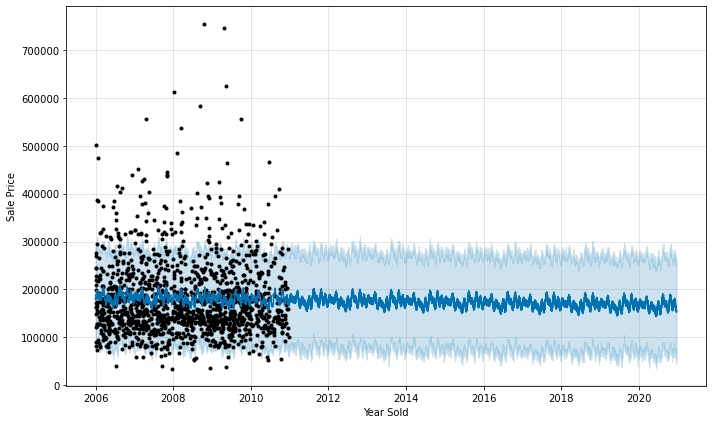

In [30]:
figure = m.plot(forecast,xlabel = 'Year Sold',ylabel ='Sale Price')

### Future prediction of the prices

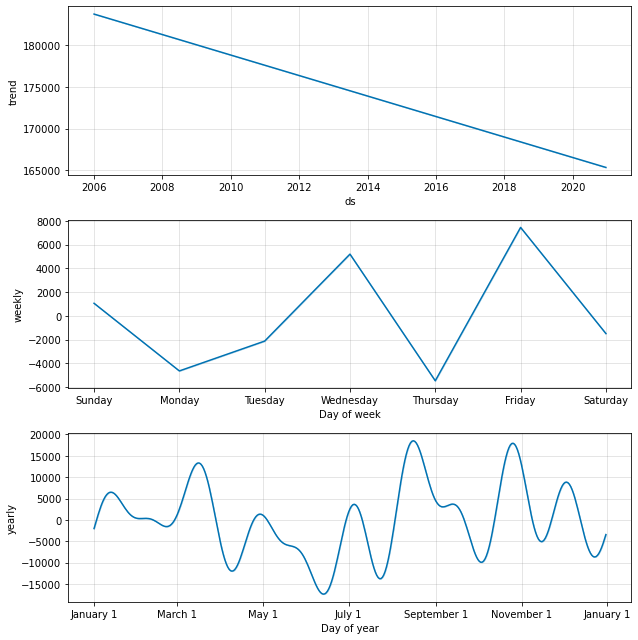

In [31]:
figure2 = m.plot_components(forecast)

### In the above graphs we can see not only the trend but seasonality as well like yearly and weekly